# **Análisis Exploratorio de Datos**

# **3. Modelos:**

## **3.1. Preprocesamiento:**

### **3.1.1. Reducción de dimensiones**

En esta sección, como su título lo indica, se analizará detalladamente la estructura de la base datos con el objetivo de reducir la dimensión original de esta. El objetivo principal de esta práctica es poder ejecutar los modelos que se presentan más adelante, pues debido a la alta dimensión se necesita mayor memoria RAM.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  int64  
 1   patient_nbr               101766 non-null  int64  
 2   race                      101766 non-null  float64
 3   gender                    101766 non-null  float64
 4   age                       101766 non-null  float64
 5   admission_type_id         101766 non-null  int64  
 6   discharge_disposition_id  101766 non-null  int64  
 7   admission_source_id       101766 non-null  int64  
 8   time_in_hospital          101766 non-null  int64  
 9   payer_code                101766 non-null  float64
 10  medical_specialty         101766 non-null  float64
 11  num_lab_procedures        101766 non-null  int64  
 12  num_procedures            101766 non-null  int64  
 13  num_medications           101766 non-null  i

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,2.0,0.0,0.0,6,25,1,1,16.0,37.0,41,0,1,0,0,0,3.0,2.0,2.0,1,3.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
1,149190,55629189,2.0,0.0,1.0,1,1,7,3,16.0,71.0,59,0,18,0,0,0,6.0,3.0,6.0,9,3.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,64410,86047875,0.0,0.0,2.0,1,1,7,2,16.0,71.0,11,5,13,2,0,1,5.0,3.0,1.0,6,3.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
3,500364,82442376,2.0,1.0,3.0,1,1,7,2,16.0,71.0,44,1,16,0,0,0,9.0,3.0,2.0,7,3.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4,16680,42519267,2.0,1.0,4.0,1,1,7,1,16.0,71.0,51,0,8,0,0,0,11.0,11.0,3.0,5,3.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


Evaluamos la asociación entre variables para descartar variables que se explican entre si misma.

In [ ]:
from dython.nominal import associations

associations(df, figsize=(12,10), mark_columns=True)

ModuleNotFoundError: No module named 'python'

Se transforman las variables categóricas anteriormente codificadas de nuevo a texto.

In [ ]:
df[cat_cols] = encoder.inverse_transform(df[cat_cols])
print(df)

        encounter_id  patient_nbr             race  gender      age  \
0            2278392      8222157        Caucasian  Female   [0-10)   
1             149190     55629189        Caucasian  Female  [10-20)   
2              64410     86047875  AfricanAmerican  Female  [20-30)   
3             500364     82442376        Caucasian    Male  [30-40)   
4              16680     42519267        Caucasian    Male  [40-50)   
...              ...          ...              ...     ...      ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)   
101763     443854148     41088789        Caucasian    Male  [70-80)   
101764     443857166     31693671        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    

Observemos los cambios.

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Unknown,Pediatrics-Endocrinology,41,0,1,0,0,0,Diabetes,Circulatorio,Circulatorio,1,none,none,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,Unknown,Unknown,59,0,18,0,0,0,Endocrino y metabolismo (sin diabetes),Diabetes,Endocrino y metabolismo (sin diabetes),9,none,none,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,Unknown,Unknown,11,5,13,2,0,1,Embarazo y puerperio,Diabetes,Causas externas,6,none,none,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,Unknown,Unknown,44,1,16,0,0,0,Infecciosas y parasitarias,Diabetes,Circulatorio,7,none,none,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,Unknown,Unknown,51,0,8,0,0,0,Neoplasmas,Neoplasmas,Diabetes,5,none,none,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


Luego, en el gráfico de correlación entre algunas variables categoricas anterior, se pudo observar ciertas relaciones entre variables, por lo que se tomó la decisión de cambiar las categorías de los medicamentos, los cuales tienen 4 categorias (up, down, steady, no), de cierta forma que las 3 primeras las reemplazaremos con si, para indicar si el medicamento fue suministrado o no, en este orden de ideas precindiremos de la variable change.

In [ ]:
medicamentos =['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']

df[medicamentos] = df[medicamentos].replace({"Up":"Si","Down":"Si","Steady":"Si"})
df['change']=df['change'].replace({"Ch":"Si"})

Ahora observemos las categorias de las variables `diag_1`, `diag_2` y `diag_3`.

In [ ]:
df["diag_1"].unique()

array(['Diabetes', 'Endocrino y metabolismo (sin diabetes)',
       'Embarazo y puerperio', 'Infecciosas y parasitarias', 'Neoplasmas',
       'Circulatorio', 'Respiratorio', 'Herida',
       'Piel y tejido subcutáneo', 'Musculoesquelético', 'Digestivo',
       'Causas externas', 'Genitourinario', 'Trastornos mentales',
       'Síntomas mal definidos', 'Sistema nervioso',
       'Sangre y órganos hematopoyéticos', 'Otro',
       'Órganos de los sentidos', 'Anomalías congénitas'], dtype=object)

In [ ]:
df["diag_2"].unique()

array(['Circulatorio', 'Diabetes', 'Neoplasmas', 'Respiratorio',
       'Sangre y órganos hematopoyéticos', 'Herida', 'Musculoesquelético',
       'Genitourinario', 'Infecciosas y parasitarias',
       'Endocrino y metabolismo (sin diabetes)', 'Digestivo',
       'Piel y tejido subcutáneo', 'Causas externas', 'Sistema nervioso',
       'Síntomas mal definidos', 'Trastornos mentales',
       'Embarazo y puerperio', 'Anomalías congénitas', 'Otro',
       'Órganos de los sentidos'], dtype=object)

In [ ]:
df["diag_3"].unique()

array(['Circulatorio', 'Endocrino y metabolismo (sin diabetes)',
       'Causas externas', 'Diabetes', 'Infecciosas y parasitarias',
       'Respiratorio', 'Herida', 'Neoplasmas', 'Genitourinario',
       'Musculoesquelético', 'Síntomas mal definidos', 'Digestivo',
       'Piel y tejido subcutáneo', 'Trastornos mentales', 'Otro',
       'Anomalías congénitas', 'Sistema nervioso',
       'Órganos de los sentidos', 'Embarazo y puerperio',
       'Sangre y órganos hematopoyéticos'], dtype=object)

Note que estas variables comparten ciertas categorías y como al modelar se apica la técnica One-Hot-Encoding, al agrupar las categorías podría ayudarnos a reducir la dimensionaliad del dataset final.

In [ ]:
categorias = pd.unique(df[["diag_1", "diag_2", "diag_3"]].values.ravel())

for cat in categorias:
    df[cat] = ((df["diag_1"] == cat) | 
               (df["diag_2"] == cat) | 
               (df["diag_3"] == cat)).astype(object)

# Verificar resultado
print(df.head())


   encounter_id  patient_nbr             race  gender      age  \
0       2278392      8222157        Caucasian  Female   [0-10)   
1        149190     55629189        Caucasian  Female  [10-20)   
2         64410     86047875  AfricanAmerican  Female  [20-30)   
3        500364     82442376        Caucasian    Male  [30-40)   
4         16680     42519267        Caucasian    Male  [40-50)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                 1    Unknown  Pediatrics-Endocrinology                  41   
1               

Observemos como quedan las columnas después  delos cambios hechos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 69 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   encounter_id                            101766 non-null  int64 
 1   patient_nbr                             101766 non-null  int64 
 2   race                                    101766 non-null  object
 3   gender                                  101766 non-null  object
 4   age                                     101766 non-null  object
 5   admission_type_id                       101766 non-null  int64 
 6   discharge_disposition_id                101766 non-null  int64 
 7   admission_source_id                     101766 non-null  int64 
 8   time_in_hospital                        101766 non-null  int64 
 9   payer_code                              101766 non-null  object
 10  medical_specialty                       101766 non-null 

In [ ]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Diabetes', 'Circulatorio', 'Endocrino y metabolismo (sin diabetes)',
       'Embarazo y puerpe

Se eliminan las columnas de las variables transformadas anteriormente.

In [ ]:
df = df.drop("diag_1",axis=1)
df= df.drop("diag_2",axis=1)
df = df.drop("diag_3",axis=1)

Sigamos examianndo la base de datos.

In [ ]:
df.describe(include=["object", "category"])

,race,gender,age,payer_code,medical_specialty,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Diabetes,Circulatorio,Endocrino y metabolismo (sin diabetes),Embarazo y puerperio,Causas externas,Infecciosas y parasitarias,Neoplasmas,Respiratorio,Herida,Sangre y órganos hematopoyéticos,Genitourinario,Piel y tejido subcutáneo,Musculoesquelético,Digestivo,Síntomas mal definidos,Trastornos mentales,Sistema nervioso,Otro,Anomalías congénitas,Órganos de los sentidos
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,5,3,10,18,73,4,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Caucasian,Female,[70-80),Unknown,Unknown,none,none,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Si,No,No,No,No,No,No,Yes,NO,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,78372,54708,26068,40256,49949,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,54383,101060,101753,101765,101764,101765,54755,78363,54864,63742,60615,83145,101074,93297,95435,95678,74896,91797,95440,83986,94419,94234,87434,94408,95181,98309,100587,101513,101132


Podemos percatarnos que la variable `medical_specialty` cuenta con una alta cantidad de categorías, por lo que para disminuir la dimesnsión d la base de datos después del encoding, se agruparán ciertas categorías.

In [ ]:
specialty_map = {
    # Medicina general / primaria
    "InternalMedicine": "General/Primary",
    "Family/GeneralPractice": "General/Primary",
    "PhysicianNotFound": "General/Primary",
    "Resident": "General/Primary",
    "Hospitalist": "General/Primary",
    "OutreachServices": "General/Primary",

    # Cirugía
    "Surgery-General": "Surgery",
    "Surgery-Cardiovascular/Thoracic": "Surgery",
    "Surgery-Neuro": "Surgery",
    "Surgery-Colon&Rectal": "Surgery",
    "Surgery-Plastic": "Surgery",
    "Surgery-Thoracic": "Surgery",
    "Surgery-PlasticwithinHeadandNeck": "Surgery",
    "Surgery-Pediatric": "Surgery",
    "Surgery-Vascular": "Surgery",
    "Surgery-Maxillofacial": "Surgery",
    "Surgeon": "Surgery",
    "SurgicalSpecialty": "Surgery",

    # Pediatría
    "Pediatrics": "Pediatrics",
    "Pediatrics-Endocrinology": "Pediatrics",
    "Pediatrics-CriticalCare": "Pediatrics",
    "Pediatrics-Pulmonology": "Pediatrics",
    "Pediatrics-Hematology-Oncology": "Pediatrics",
    "Pediatrics-Neurology": "Pediatrics",
    "Pediatrics-EmergencyMedicine": "Pediatrics",
    "Pediatrics-InfectiousDiseases": "Pediatrics",
    "Pediatrics-AllergyandImmunology": "Pediatrics",
    "Anesthesiology-Pediatric": "Pediatrics",
    "Cardiology-Pediatric": "Pediatrics",

    # Ginecología y obstetricia
    "ObstetricsandGynecology": "Gynecology/Obstetrics",
    "Obsterics&Gynecology-GynecologicOnco": "Gynecology/Obstetrics",
    "Obstetrics": "Gynecology/Obstetrics",
    "Gynecology": "Gynecology/Obstetrics",
    "Perinatology": "Gynecology/Obstetrics",

    # Medicina interna - subespecialidades
    "Cardiology": "InternalMedicine-Subspecialty",
    "Pulmonology": "InternalMedicine-Subspecialty",
    "Nephrology": "InternalMedicine-Subspecialty",
    "Endocrinology": "InternalMedicine-Subspecialty",
    "Endocrinology-Metabolism": "InternalMedicine-Subspecialty",
    "Gastroenterology": "InternalMedicine-Subspecialty",
    "Hematology": "InternalMedicine-Subspecialty",
    "Oncology": "InternalMedicine-Subspecialty",
    "Hematology/Oncology": "InternalMedicine-Subspecialty",
    "Rheumatology": "InternalMedicine-Subspecialty",
    "InfectiousDiseases": "InternalMedicine-Subspecialty",
    "AllergyandImmunology": "InternalMedicine-Subspecialty",
    "PhysicalMedicineandRehabilitation": "InternalMedicine-Subspecialty",
    "SportsMedicine": "InternalMedicine-Subspecialty",
    "Proctology": "InternalMedicine-Subspecialty",

    # Neurología y salud mental
    "Neurology": "Neuro/MentalHealth",
    "Neurophysiology": "Neuro/MentalHealth",
    "Psychiatry": "Neuro/MentalHealth",
    "Psychiatry-Child/Adolescent": "Neuro/MentalHealth",
    "Psychiatry-Addictive": "Neuro/MentalHealth",
    "Psychology": "Neuro/MentalHealth",

    # Especialidades diagnósticas
    "Radiology": "Diagnostics",
    "Radiologist": "Diagnostics",
    "Pathology": "Diagnostics",
    "Speech": "Diagnostics",

    # Otros
    "Dentistry": "Other",
    "Ophthalmology": "Other",
    "Otolaryngology": "Other",
    "Podiatry": "Other",
    "Dermatology": "Other",
    "Osteopath": "Other",
    "Anesthesiology": "Other",
    "DCPTEAM": "Other",
    "Unknown": "Other"
}

df_copy=df.copy() 

# Reemplazar directamente en la columna original
df["medical_specialty"] = df["medical_specialty"].map(specialty_map)

# En caso de valores no encontrados en el diccionario, marcarlos como "Other"
df["medical_specialty"] = df["medical_specialty"].fillna("Other")

# Ver resultados
print(df["medical_specialty"].value_counts())

medical_specialty
Other                            61255
General/Primary                  22157
InternalMedicine-Subspecialty     9619
Surgery                           5011
Diagnostics                       1211
Neuro/MentalHealth                1167
Gynecology/Obstetrics              774
Pediatrics                         572
Name: count, dtype: int64


Finalmente, la variable `medical_specialty` cuenta con solo 8 categorías.

In [ ]:
df.describe(include=["category", "object"])

,race,gender,age,payer_code,medical_specialty,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Diabetes,Circulatorio,Endocrino y metabolismo (sin diabetes),Embarazo y puerperio,Causas externas,Infecciosas y parasitarias,Neoplasmas,Respiratorio,Herida,Sangre y órganos hematopoyéticos,Genitourinario,Piel y tejido subcutáneo,Musculoesquelético,Digestivo,Síntomas mal definidos,Trastornos mentales,Sistema nervioso,Otro,Anomalías congénitas,Órganos de los sentidos
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,5,3,10,18,8,4,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Caucasian,Female,[70-80),Unknown,Other,none,none,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Si,No,No,No,No,No,No,Yes,NO,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,78372,54708,26068,40256,61255,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,54383,101060,101753,101765,101764,101765,54755,78363,54864,63742,60615,83145,101074,93297,95435,95678,74896,91797,95440,83986,94419,94234,87434,94408,95181,98309,100587,101513,101132


Y por último, se descartan ciertas columnas que no aportan mucha información al objetivo del proyecto. Las variables `encounter_id`, `payer_code` y `patient_nbr` son categorías únicas; por su parte las columnas `examide` y `citoglipton` solo cuentan con una categoría que indica la ausenica de la misma. Y la variable `diabetesMed` se eja a un lado debido a que anterioremente se reescribió.

In [ ]:
df = df.drop("encounter_id",axis=1)
df = df.drop("patient_nbr",axis=1)
df = df.drop("examide",axis=1)
df = df.drop("citoglipton",axis=1)
df = df.drop("payer_code", axis=1)
df = df.drop("diabetesMed",axis=1)

Ahora observe que la variable objetivo `readmitted` cuanta con tres categorías y dos de ellas significan un mismo acontecimiento, por lo que se modifica.

In [ ]:
df["readmitted"].unique()

array(['NO', '>30', '<30'], dtype=object)

In [ ]:
df["readmitted"] = df["readmitted"].replace({">30": "SI", "<30": "SI"})

In [ ]:
df["readmitted"].unique()

array(['NO', 'SI'], dtype=object)

## **3.2. Modelación**

Se selccionan las variables explicativas y la respuesta.

In [ ]:
X = df.drop("readmitted", axis=1)
y = df["readmitted"].map({"NO": 0, "SI": 1})  

Se separan el conjunto de entrenamiento y test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Creamos vectores con cada tipo de variable para hacer el correcto manejo de las variables antes de modelar.

In [ ]:
cat_features = X.select_dtypes(include=["object", "category"]).columns
num_features = X.select_dtypes(include=["int64", "float64"]).columns

A continuación, se crean los pipelines de preprocesamiento, modelo logístico con gridsearch y validación ccruzada estratificada, y modelo de knn con gridsearch y vlaidación cruzada estratificada.

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

In [ ]:
log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [ ]:
knn_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier())
])

Se verifica el tamaño del dataset que se obtiene al aplicar la técnica One-Hot-Enconde.

In [ ]:
print("Shape original de X_train:", X_train.shape)

X_train_transformed = log_reg_pipeline.named_steps["preprocessor"].fit_transform(X_train)
print("Shape después de OneHot + Escalado:", X_train_transformed.shape)

Shape original de X_train: (81412, 59)
Shape después de OneHot + Escalado: (81412, 129)


In [ ]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hiperparámetros
param_grid_log_reg = {
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__penalty": ["l1","l2"],   
    "classifier__solver": ["liblinear","saga"]
}

param_grid_knn = {
    "classifier__n_neighbors": list(range(1, 20)),
    "classifier__weights": ["uniform", "distance"],
    "classifier__metric": ["minkowski", "euclidean", "manhattan"]
}

In [ ]:
grid_log_reg_Stract = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid_log_reg,
    cv=cv_strategy,
    scoring="accuracy",
    n_jobs=-1
)

grid_knn_Stract = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid_knn,
    cv=cv_strategy,
    scoring="accuracy",
    n_jobs=-1
)

In [ ]:
grid_log_reg = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid_log_reg,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_knn = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid_knn,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

Se importan librerías necesarias para la evaluación de cada modelo.

In [ ]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, auc, classification_report
)

### **3.2.1.  Regresión Logistica GridSearch:**

In [ ]:
grid_log_reg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype...
       'Genitourinario', 'Piel y tejido subcutáneo', 'Musculoesquelético',
       'Digestivo', 'Síntomas mal definidos', 'Trastornos mentales',
       'Sistema nervioso', 'Otro', 'Anomalías congénitas',
       'Órganos de los sentidos'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
print("Mejor modelo - Logistic Regression")
print("Mejores parámetros:", grid_log_reg.best_params_)
print("Mejor score (CV):", grid_log_reg.best_score_)

Mejor modelo - Logistic Regression
Mejores parámetros: {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Mejor score (CV): 0.6226845368165365


El ajuste óptimo se logró con los parámetros `C=0.1`, `penalty='l1'` y `solver='liblinear'`, lo que indica que la regularización L1 funcionó mejor para este conjunto de datos. Además, el mejor puntaje de validación cruzada obtenido por el modelo fue aproximadamente 0.623, lo cual refleja un desempeño moderado en la clasificación de los datos de entrenamiento, sugiriendo que el modelo captura ciertos patrones pero aún tiene espacio de mejora.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, auc, classification_report
)

def evaluar_modelo(modelo, X_test, y_test):
    # Predicciones
    y_pred = modelo.predict(X_test)
   
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]
  
    # --- Matriz de confusión ---
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel("Predicciones")
    plt.ylabel("Valores reales")
    plt.title("Matriz de Confusión")
    plt.show()

    # --- Métricas ---
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

    # --- Curva ROC ---
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0,1], [0,1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC")
    plt.legend(loc="lower right")
    plt.show()

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc
    }


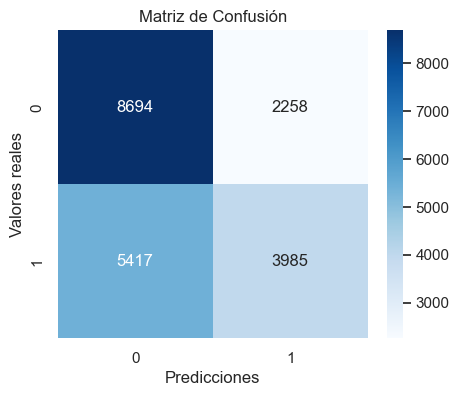

Accuracy: 0.6229242409354426
Precision: 0.6383149127022265
Recall: 0.4238459902148479
F1-score: 0.5094279322467242

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.62      0.79      0.69     10952
           1       0.64      0.42      0.51      9402

    accuracy                           0.62     20354
   macro avg       0.63      0.61      0.60     20354
weighted avg       0.63      0.62      0.61     20354



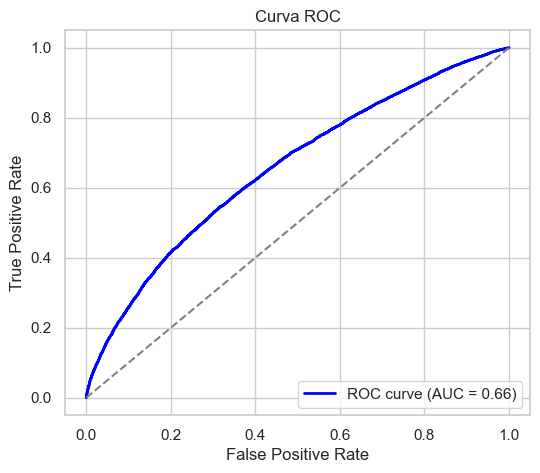

In [ ]:
resultados_log_gs = evaluar_modelo(grid_log_reg, X_test, y_test)

Los resultados de la evaluación del modelo muestran una exactitud global de aproximadamente 62%, lo que indica un desempeño moderado en la clasificación. La matriz de confusión evidencia que el modelo clasifica mejor la clase 0 que la clase 1, ya que logra identificar correctamente 8694 casos negativos frente a solo 3985 positivos, mientras que se observa un número considerable de falsos negativos (5417). En términos de métricas, la precisión es cercana al 64%, lo que refleja una proporción aceptable de predicciones positivas correctas; sin embargo, el recall para la clase 1 es bajo (42%), lo que implica que el modelo tiene dificultades para detectar todos los casos positivos. En consecuencia, el F1-score para la clase 1 es de apenas 0.51, mientras que para la clase 0 es mayor (0.69), confirmando que el modelo está sesgado hacia la clase mayoritaria. 

### **3.2.2. Regresión Logistica Estractificado:**

In [ ]:
grid_log_reg_Stract.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_...
       'Genitourinario', 'Piel y tejido subcutáneo', 'Musculoesquelético',
       'Digestivo', 'Síntomas mal definidos', 'Trastornos mentales',
       'Sistema nervioso', 'Otro', 'Anomalías congénitas',
       'Órganos de los sentidos'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
print("Mejor modelo - Logistic Regression Estractificado")
print("Mejores parámetros:", grid_log_reg_Stract.best_params_)
print("Mejor score (CV):", grid_log_reg_Stract.best_score_)

Mejor modelo - Logistic Regression Estractificado
Mejores parámetros: {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Mejor score (CV): 0.6225127246811579


Luego de correr el modelo de regresión logistica estractificado encontrasmos que los mejores parámetros son `C=10`,  `penalty =l1` y `solver = liblinear`. El mejor puntaje de validación cruzada obtenido fue aproximadamente 0.623, muy similar al alcanzado sin estratificación, lo que indica que el proceso de muestreo estratificado no produjo mejoras significativas en el rendimiento del modelo. Esto sugiere que, aunque el estratificado ayuda a mantener la proporción de clases en cada partición, en este caso específico no cambió de manera relevante la capacidad predictiva de la regresión logística.


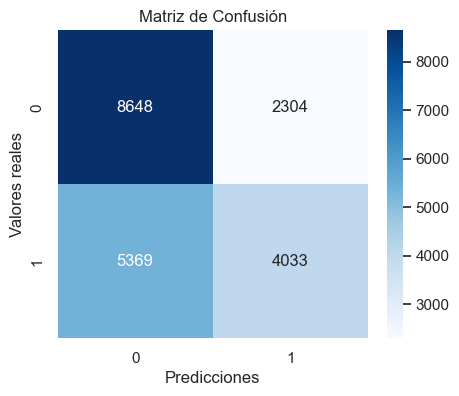

Accuracy: 0.6230225017195637
Precision: 0.6364210194098153
Recall: 0.4289512869602212
F1-score: 0.51248491009594

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.62      0.79      0.69     10952
           1       0.64      0.43      0.51      9402

    accuracy                           0.62     20354
   macro avg       0.63      0.61      0.60     20354
weighted avg       0.63      0.62      0.61     20354



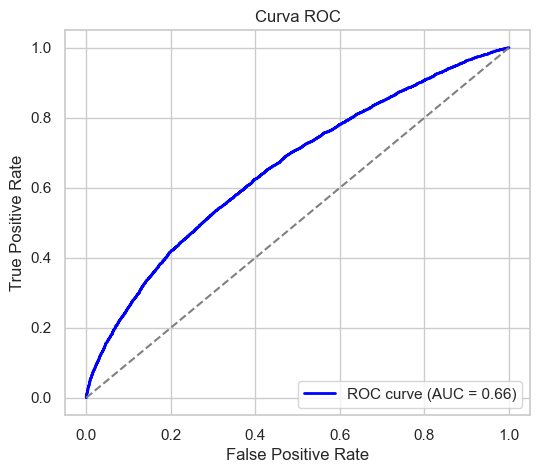

In [ ]:
resultados_log_gs = evaluar_modelo(grid_log_reg_Stract, X_test, y_test)

Los resultados de la regresión logística estratificada muestran un rendimiento moderado, con una exactitud global cercana al 62%. La matriz de confusión revela que el modelo predice con mayor efectividad la clase 0, donde logra identificar correctamente 8648 casos, mientras que en la clase 1 el número de verdaderos positivos es menor (4033), acompañado de un alto número de falsos negativos (5369). Esto se refleja en las métricas de evaluación: la precisión alcanza aproximadamente 0.64, pero el recall para la clase 1 apenas llega al 43%, lo que indica que el modelo tiene dificultades para detectar los casos positivos. El F1-score promedio ponderado se sitúa alrededor de 0.61, confirmando un balance limitado entre precisión y recall. Finalmente, la curva ROC con un AUC de 0.66 muestra que el modelo posee cierta capacidad discriminativa superior al azar, aunque todavía lejos de un desempeño óptimo, lo que sugiere que se podría mejorar mediante ajustes adicionales o técnicas de balanceo de clases.

### **3.2.3. KNN-GridSearch:**

In [ ]:
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype...
       'Sistema nervioso', 'Otro', 'Anomalías congénitas',
       'Órganos de los sentidos'],
      dtype='object'))])),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__metric': ['minkowski', 'euclidean',
                                                'manhattan'],
                         'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print("\nMejor modelo - KNN")
print("Mejores parámetros:", grid_knn.best_params_)
print("Mejor score (CV):", grid_knn.best_score_)


Mejor modelo - KNN
Mejores parámetros: {'classifier__metric': 'minkowski', 'classifier__n_neighbors': 17, 'classifier__weights': 'uniform'}
Mejor score (CV): 0.6062742803908057


El modelo KNN optimizado mediante GridSearchCV, utiliza la métrica de distancia Minkowski, un número de 17 vecinos y un esquema de ponderación basado en la distancia. Con estos parámetros, el mejor puntaje de validación cruzada obtenido fue de aproximadamente 0.607, lo cual refleja un rendimiento ligeramente inferior al alcanzado por la regresión logística en las pruebas previas. Esto sugiere que, aunque el modelo KNN puede capturar relaciones locales entre los datos, en este caso no logra superar la capacidad predictiva de la regresión logística, posiblemente debido a la naturaleza del conjunto de datos y la distribución de las clases.

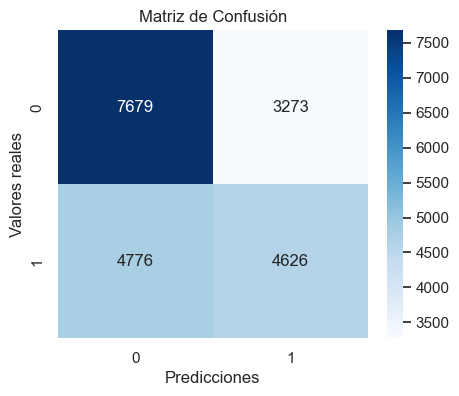

Accuracy: 0.604549474304805
Precision: 0.5856437523737182
Recall: 0.4920229738353542
F1-score: 0.5347667764869083

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.62      0.70      0.66     10952
           1       0.59      0.49      0.53      9402

    accuracy                           0.60     20354
   macro avg       0.60      0.60      0.60     20354
weighted avg       0.60      0.60      0.60     20354



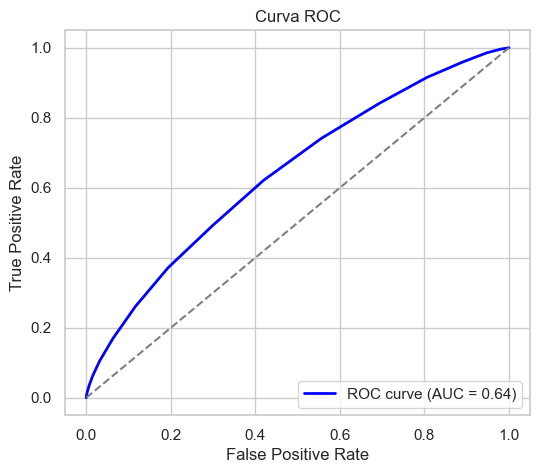

In [ ]:
resultados_log_gs = evaluar_modelo(grid_knn, X_test, y_test)

El modelo de clasificación alcanza una exactitud de alrededor del 60%, lo que significa que acierta en 6 de cada 10 casos, mostrando un mejor desempeño en la clase 0 que en la clase 1. La matriz de confusión evidencia que detecta más fácilmente los casos negativos (clase 0) que los positivos (clase 1), lo cual se refleja en un recall de 0.70 para la clase 0 frente a 0.49 en la clase 1. La precisión global es de 0.58 y el F1-score de 0.53, lo que señala un balance limitado entre precisión y recall, especialmente en la identificación de los positivos. La curva ROC, con un AUC de 0.64, indica que el modelo logra diferenciar las clases mejor que el azar, aunque con una capacidad discriminativa aún baja. En conjunto, los resultados muestran que el modelo es moderadamente útil, pero requiere mejoras para incrementar su capacidad de detección en la clase 1.

### **3.2.4. KNN con validación cruzada stratificada**

In [ ]:
grid_knn_Stract.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_...
       'Sistema nervioso', 'Otro', 'Anomalías congénitas',
       'Órganos de los sentidos'],
      dtype='object'))])),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__metric': ['minkowski', 'euclidean',
                                                'manhattan'],
                         'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print("\nMejor modelo - KNN")
print("Mejores parámetros:", grid_knn_Stract.best_params_)
print("Mejor score (CV):", grid_knn_Stract.best_score_)


Mejor modelo - KNN
Mejores parámetros: {'classifier__metric': 'minkowski', 'classifier__n_neighbors': 18, 'classifier__weights': 'uniform'}
Mejor score (CV): 0.6064217910600009


El modelo KNN fue entrenado utilizando validación cruzada estratificada y, tras el ajuste de hiperparámetros mediante GridSearchCV, se encontró que los mejores parámetros a utilizar corresponde a un número de vecinos igual a 18, utilizando la métrica de Minkowski y el esquema de ponderación por distancia. Con estos parámetros, el modelo alcanzó un mejor puntaje de validación cruzada de aproximadamente 0.606, lo cual indica un rendimiento moderado y consistente con los resultados obtenidos en otros modelos probados previamente. Este valor sugiere que, aunque KNN logra un desempeño aceptable, todavía presenta limitaciones en su capacidad de generalización.

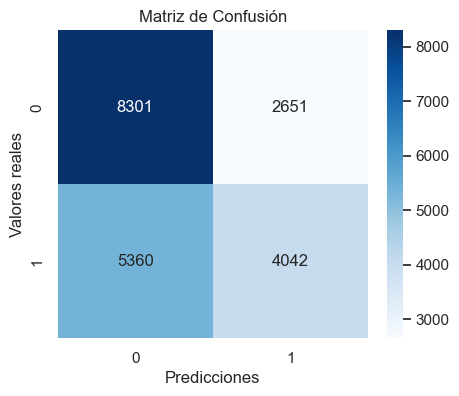

Accuracy: 0.606416429203105
Precision: 0.6039145375765725
Recall: 0.4299085300999787
F1-score: 0.5022677850264057

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.61      0.76      0.67     10952
           1       0.60      0.43      0.50      9402

    accuracy                           0.61     20354
   macro avg       0.61      0.59      0.59     20354
weighted avg       0.61      0.61      0.59     20354



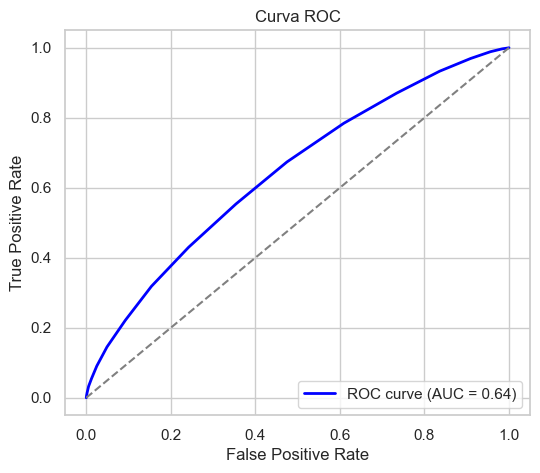

In [ ]:
resultados_log_gs = evaluar_modelo(grid_knn_Stract, X_test, y_test)

A partir del análisis del modelo mostrado, se puede observar que la precisión general (accuracy) es de aproximadamente 60.6%, lo cual indica que el modelo acierta un poco más de la mitad de las veces. La matriz de confusión revela que el modelo tiene un mejor desempeño al predecir la clase 0 (8301 verdaderos negativos vs. 2651 falsos positivos), mientras que tiene dificultades con la clase 1, ya que confunde 5360 casos como negativos y solo acierta en 4042 predicciones positivas. Esto se ve reflejado en las métricas por clase: para la clase 0, el recall es de 0.76 y el F1-score de 0.67, mientras que para la clase 1, el recall cae a 0.43 y el F1-score a 0.50, lo que muestra que el modelo no es muy efectivo capturando los positivos reales. A nivel general, el F1-score macro y ponderado están ambos en 0.59, lo cual refuerza que el rendimiento es bajo, especialmente en escenarios con clases balanceadas o donde ambas clases tienen igual importancia. Finalmente, la curva ROC con un AUC de 0.64 sugiere que el modelo tiene una capacidad limitada para discriminar entre clases, siendo apenas mejor que el azar (AUC = 0.5), por lo que sería recomendable mejorar el modelo con técnicas de ajuste de hiperparámetros, selección de características o algoritmos más robustos.